# Аналитика в авиакомпании

## Описание проекта

В нашем распоряжении находятся  данные по количеству полетов по различным моделям самолетов, а также по среднему количеству рейсов, прибывающих в город за день.

Необходимо установить самые часто используемые модели самолетов для полетов, а также определить города, куда чаще всего прибывали рейсы.

Проект включает:
- импорт файлов
- изучение данных
- проверка типов данных на корректность
- определение топ-10 городов по количеству рейсов
- графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов
- выводы по каждому из графиков

### Импорт файлов, изучение данных, проверка типов данных на корректность

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
sns.set()
pd.options.display.float_format = '{:.2f}'.format

In [2]:
df_ma = pd.read_csv('/datasets/query_1.csv')
# В нём содержится информация о:
# model — модели самолета
# flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года

In [3]:
df_ma.info()
df_ma.sort_values(by=['flights_amount'], ascending=False).reset_index(drop=True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


,model,flights_amount
0,Cessna 208 Caravan,4557
1,Bombardier CRJ-200,4446
2,Sukhoi SuperJet-100,4185
3,Airbus A321-200,960
4,Boeing 737-300,630
5,Airbus A319-100,607
6,Boeing 767-300,600
7,Boeing 777-300,300


In [4]:
df = pd.read_csv('/datasets/query_3.csv') 
# В нём содержится информация о:
# city — городах
# average_flights — среднем количестве рейсов, прибывающих в город city за день в августе 2018 года

In [5]:
df.info() 
display(df.sample(5, random_state=1))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


,city,average_flights
94,Челябинск,6.71
78,Сыктывкар,4.13
17,Геленджик,2.59
100,Ярославль,1.32
36,Кызыл,1.28


In [6]:
dfs=df.sort_values(by=['average_flights'], ascending=False).head(10).reset_index(drop=True) # топ-10 городов по количеству пребывающих рейсов
dfs

,city,average_flights
0,Москва,129.77
1,Санкт-Петербург,31.16
2,Новосибирск,17.32
3,Красноярск,11.58
4,Екатеринбург,11.32
5,Ростов-на-Дону,10.19
6,Пермь,10.13
7,Брянск,10.00
8,Сочи,9.61
9,Ульяновск,9.58


У нас имеются данные по количеству полетов за сентябрь 2018 года по 8 моделям самолетов, а также по среднему количеству рейсов, прибывающих в город за день в августе 2018 года (данные по 101 городу).
В обоих датасетах типы данных отображены корректно - модель самолета и город имеют строковый тип, количество рейсов - целочисленно, а среднее число полетов за день в августе по городу -  числа с плавающей запятой. Пропуски отсутствуют.
Также, на основе второго датасета мы выбрали топ-10 городов по количеству рейсов, который прокомментируем после посроения графиков.

### Графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов

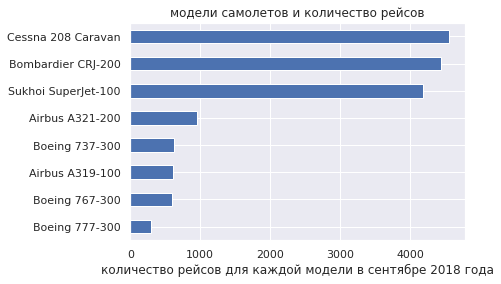

In [7]:
# модели самолетов и количество рейсов
df_ma.sort_values(by=['flights_amount']).plot.barh(
    grid=True, title="модели самолетов и количество рейсов", legend=False, x='model'
              )
plt.ylabel('') # очевидно, что ось представляет собой модели самолетов, поэтому убираем лишнюю информацию
plt.xlabel('количество рейсов для каждой модели в сентябре 2018 года') 
plt.show()

Наиболее часто исользуемые модели самолетов для полетов в сентябре 2018 года были три модели с результатом более четырех тысяч полетов. Лидер - Cessna 208 Caravan - американский самолёт общего назначения, который используется на авиалиниях малой протяжённости и вмещющий всего девять пассажиров. 
На втором месте - канадский Bombardier CRJ-200, вместимостью 50 пассажиров. 
И на третьем месте - Sukhoi SuperJet-100,  пассажирский самолёт, разработанный в России, предназначенный для перевозки до 108 пассажиров на дальность до 4600 км. 

Остальные места занимают разные модели Boeing и Airbus, в зависимости от модели способные перевозить 100-200 пассажиров и летать на длинные дистанции более 7 тысяч километров. На последнем месте самый вместительный Boeing 777 (368 пассажиров или больше), предназначенный для авиалиний большой протяжённости ( от 9100 до 17 500 км).

Понятно, что если бы мы смотрели на количество пассажиров, которые летали на каждой из моделей, результаты были бы совсем другие. А в данном рейтинге лидируют самолеты, которые поднимались в небо чаще, но перевозили меньше пассажиров и на меньшие дистанции. 



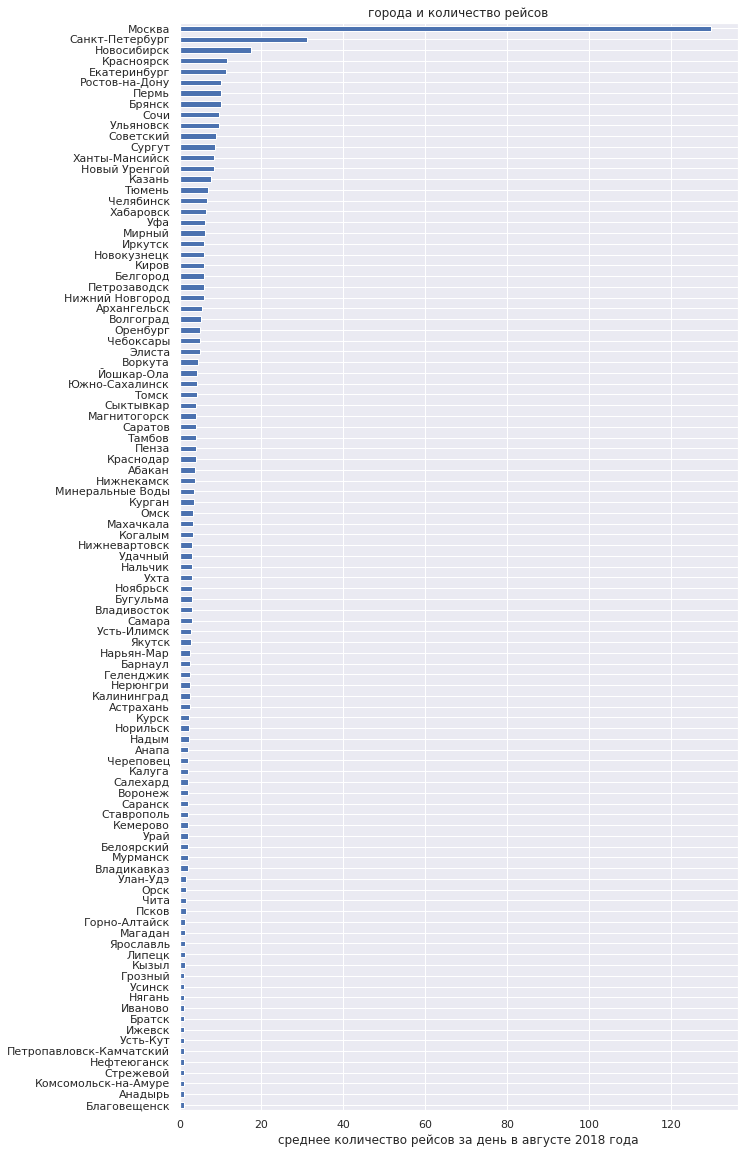

In [8]:
# города и количество рейсов
df.sort_values(by=['average_flights']).plot.barh(
    grid=True, title="города и количество рейсов", legend=False, x='city',figsize=(10,20)
              )
plt.ylabel('') # очевидно, что ось представляет собой модели самолетов, поэтому убираем лишнюю информацию
plt.xlabel('среднее количество рейсов за день в августе 2018 года') 
plt.show()

Так как у нас более 100 городов, график по городам и количеству рейсов в августовский день становится трудным для просмотра. 
Если мы хотим видеть информацию по всем городам, то было бы здорово представить его на карте России, где города обозначались бы точками, и толщина точки с подписью говорили бы о среднем количестве прилетающих рейсов. Пока что мы не умеем подключать геоданные к визуализации, поэтому перейдем к следующему графику, где представлена та же информация по топ-10 городам.

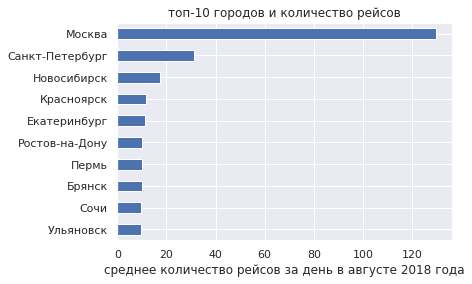

In [9]:
# топ-10 городов и количество рейсов
dfs.sort_values(by=['average_flights']).plot.barh(
    grid=True, title="топ-10 городов и количество рейсов", legend=False, x='city'
              )
plt.ylabel('') # очевидно, что ось представляет собой модели самолетов, поэтому убираем лишнюю информацию
plt.xlabel('среднее количество рейсов за день в августе 2018 года') 
plt.show()

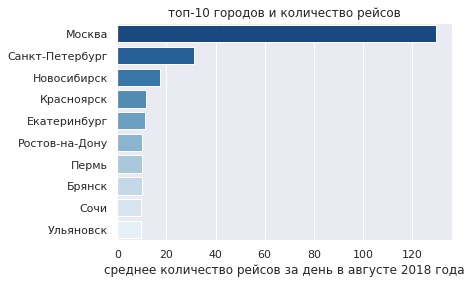

In [10]:
# сделаем такой же график топ-10 в seaborn
sns.barplot(y=dfs['city'], x=dfs['average_flights'], palette='Blues_r')
plt.title('топ-10 городов и количество рейсов', size=12)
plt.xlabel('среднее количество рейсов за день в августе 2018 года')
plt.ylabel('')
plt.show()

Мы выбрали топ-10 городов по количеству пребывающих рейсов. Видно, что Москва лидирует с большим отрывом - около 130 рейсов в среднем в августовский день, на втором месте Санкт-Петербург, - 31 рейс, и на третьем, Новосибирск - 17 рейсов. Результат ожидаем, т.к. это самые крупные города России по количеству населения. После идут Красноярск и Екатеринбург, также города, где население больше миллиона человек, оба с результатом около 12 и 11 рейсов в день. 

Следующие в списке города имеют схожее количество рейсов в районе 10. Заметим, что, в десятку по количеству рейсов также вошли три города, в которых население существенно меньше миллиона - Брянск, Сочи и Ульяновск. Сочи - летний курорт, поэтому высокое количество полетов туда в августе вполне логично. А чтобы понять причины попадания Брянска и Ульяновска в топ-10 по августовским рейсам требуется дальнейший анализ. Воможно, там было много коротких рейсов на маловместимых моделях самолетов.

## Общий вывод

После предыдущих этапов работы мы получили данные по количеству полетов за сентябрь 2018 года по 8 моделям самолетов, а также по среднему количеству рейсов, прибывающих в город за день в августе 2018 года (данные по 101 городу). Эти данные не требовали предобработки.

Согласно нашим данным, самые часто используемые модели самолетов для полетов в сентябре 2018 года были самолеты с малой пассажировместимостью и предназначенные для малой или средней протяженности - Cessna 208 Caravan, Bombardier CRJ-200 и   Sukhoi SuperJet-100. На последних местах оказались самые вместительные модели самолетов предназначенные для дальних полетов - Airbus A319-100, Boeing 767-300 и Boeing 777-300. Таким образом, чаще всего летали самолеты перевозящие небольшое количество пассажирова на малые и средние дистанции.

Что касается городов, куда чаще всего прибывали рейсы августовским днем 2018 года, то безоговорочно лидирует Москва с цифрой 130 рейсов в день, за которой следуют Санкт-Петербург (с результатом в четыре раза меньше), Новосибирск и  другие крупные города с населением более полумиллиона. Также в первую десятку вошли менее населенные Сочи (курортный город пользуется спросом), Брянск и Ульяновск.  На последних местах в сотне городов по рейсам находятся города Дальнего Востока и не самые многонаселенные города Западной Сибири, где осуществлялось в среднем по одному прилету в день.